## **Práctica 16: Clasificación COVID-19 (Adultos mayores)**

Nombre: Osvaldo Ibañez Guzman

No. Cuenta: 316058672

Email: osva552920@gmail.com

### **Caso de estudio**

**Objetivo.** Clasificar la mortalidad de adultos mayores contagiados con COVID-19 en la Ciudad de México.

**Emplear los algoritmos:** 

* Árbol de decisión.
* Bosque aleatorio.

**Fuente de datos:**

https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia

**Variables:**

No.	| Nombre | Descripción | Valores
* ID
* 1	SEXO	Identifica el sexo del paciente.	1-Mujer, 2-Hombre, 99-No Especificado
* 2	TIPO_PACIENTE	Identifica el tipo de atención que recibió el paciente.	1-Ambulatorio, 2-Hospitalizado, 99-No Especificado 
* 3	SITUACION	Identifica la situación (vivo o muerto) del paciente. 	1-Vivo 
2-Muerto
* 4	INTUBADO	Identifica si el paciente requirió de intubación.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 5	NEUMONIA	Identifica si el paciente se le diagnosticó con neumonía.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 6	EDAD	Identifica la edad del paciente.	Numérico
* 7	DIABETES	Identifica si el paciente tiene un diagnóstico de diabetes.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 8	EPOC	Identifica si el paciente tiene un diagnóstico de Enfermedad Pulmonar Obstructiva Crónica (EPOC).	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 9	ASMA	Identifica si el paciente tiene un diagnóstico de asma.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 10	INMUSUPPR	Identifica si el paciente tiene un diagnóstico de inmunosupresión.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 11	HIPERTENSION	Identifica si el paciente tiene un diagnóstico de hipertensión.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 12	OTRA_COM	Identifica si el paciente tiene diagnóstico de otras enfermedades.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 13	CARDIOVASCULAR	Identifica si el paciente tiene un diagnóstico de enfermedades cardiovasculares.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 14	OBESIDAD	Identifica si el paciente tiene diagnóstico de obesidad.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 15	RENAL_CRONICA	Identifica si el paciente tiene diagnóstico de insuficiencia renal crónica.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 16	TABAQUISMO	Identifica si el paciente tiene hábito de tabaquismo.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 17	OTRO_CASO	Identifica si el paciente tuvo contacto con algún otro caso diagnosticado con SARS-CoV-2.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 18	RESULTADO_ANTIGENO	Identifica el resultado del análisis de la muestra de antígeno para SARS-CoV-2.	1-Positivo SARS-CoV-2, 2-Negativo SARS-CoV-2, 97- No Aplica (Caso sin muestra)
* 19	CLASIFICACION_FINAL	Identifica la clasificación del resultado de la prueba Covid-19: confirmado, inválido, no realizado, sospechoso y negativo.	1-Confirmado por Asociación Clínica Epidemiológica, 2-Confirmado por comité de Dictaminación, 3-Caso confirmado, 4-Inválido por laboratorio, 5-No realizado por laboratorio, 6-Caso sospechoso, 7-Negativo a SARS-CoV-2. 
* 20	UCI	Identifica si el paciente requirió ingresar a una Unidad de Cuidados Intensivos (UCI).	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado

### **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
Covid = pd.read_csv('CovidAdultosMayores.csv')
Covid

,ID,SEXO,TIPO_PACIENTE,SITUACION,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI
0,21,2,1,Vivo,5,2,62,2,2,2,...,1,2,2,2,2,2,2,5,6,5
1,23,1,1,Vivo,5,2,67,1,2,2,...,2,2,2,2,2,2,1,5,3,5
2,31,1,1,Vivo,5,2,62,2,2,2,...,1,2,2,1,2,2,1,1,3,5
3,39,1,1,Vivo,5,2,76,2,2,2,...,2,2,2,2,2,2,2,5,5,5
4,81,1,1,Vivo,5,2,60,2,2,2,...,2,2,2,1,2,2,2,5,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591347,15563006,1,1,Vivo,5,2,67,4,4,4,...,4,4,4,4,4,4,1,2,7,5
591348,15563010,2,1,Vivo,5,2,68,4,4,4,...,4,4,4,4,4,4,1,2,7,5
591349,15563012,2,1,Vivo,5,2,69,4,4,4,...,4,4,4,4,4,4,1,2,7,5
591350,15563014,2,1,Vivo,5,2,71,4,4,4,...,4,4,4,4,4,4,1,2,7,5


In [3]:
Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591352 entries, 0 to 591351
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   591352 non-null  int64 
 1   SEXO                 591352 non-null  int64 
 2   TIPO_PACIENTE        591352 non-null  int64 
 3   SITUACION            591352 non-null  object
 4   INTUBADO             591352 non-null  int64 
 5   NEUMONIA             591352 non-null  int64 
 6   EDAD                 591352 non-null  int64 
 7   DIABETES             591352 non-null  int64 
 8   EPOC                 591352 non-null  int64 
 9   ASMA                 591352 non-null  int64 
 10  INMUSUPR             591352 non-null  int64 
 11  HIPERTENSION         591352 non-null  int64 
 12  OTRA_COM             591352 non-null  int64 
 13  CARDIOVASCULAR       591352 non-null  int64 
 14  OBESIDAD             591352 non-null  int64 
 15  RENAL_CRONICA        591352 non-nu

In [4]:
print(Covid.groupby('SITUACION').size())

SITUACION
Finado     34296
Vivo      557056
dtype: int64


In [5]:
Covid = Covid.drop(columns='ID')

In [6]:
Covid.describe()

,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI
count,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000
mean,1.460714,1.117209,4.630892,1.917734,68.538033,1.812335,2.005494,2.014942,2.017462,1.718482,2.013456,1.998169,1.950273,2.011338,1.962689,1.646598,2.611008,5.631135,4.641107
std,0.498455,0.321670,1.020574,0.275912,8.773569,0.490601,0.282409,0.263831,0.258697,0.536544,0.267491,0.294227,0.362907,0.270805,0.348208,0.544160,1.458051,1.993621,0.988686
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,5.000000,2.000000,62.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,5.000000
50%,1.000000,1.000000,5.000000,2.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,5.000000
75%,2.000000,1.000000,5.000000,2.000000,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,7.000000,5.000000
max,2.000000,2.000000,5.000000,3.000000,122.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,7.000000,5.000000


#### 2) Seleccion de caracteristicas 

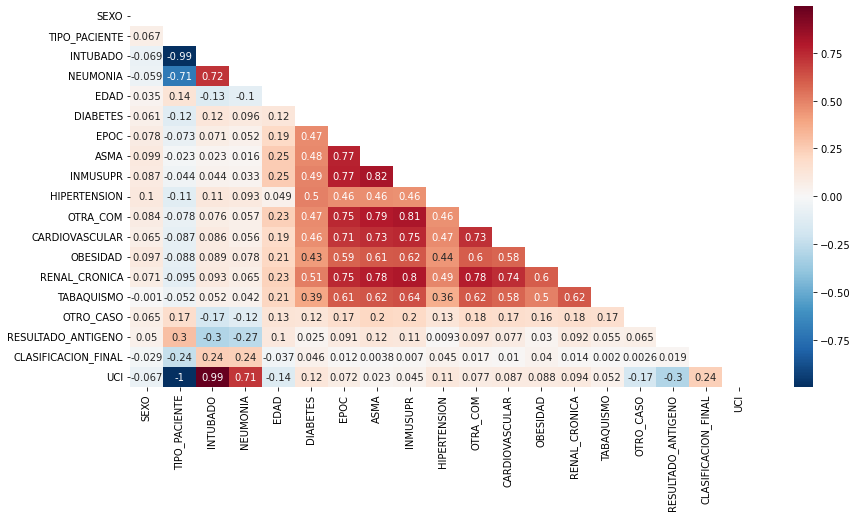

In [7]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Covid.corr())
sns.heatmap(Covid.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [8]:
#Variables predictoras
X = np.array(Covid[['SEXO', 
                       'TIPO_PACIENTE', 
                       'INTUBADO', 
                       'NEUMONIA', 
                       'EDAD', 
                       'DIABETES',
                       'EPOC',
                       'ASMA',
                       'INMUSUPR',
                       'HIPERTENSION',
                       'OTRA_COM',
                       'CARDIOVASCULAR',
                       'OBESIDAD',
                       'RENAL_CRONICA',
                       'TABAQUISMO',
                       'OTRO_CASO',
                       'RESULTADO_ANTIGENO',
                       'CLASIFICACION_FINAL',
                       'UCI']])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2,1,5,2,62,2,2,2,2,1,2,2,2,2,2,2,5,6,5
1,1,1,5,2,67,1,2,2,2,2,2,2,2,2,2,1,5,3,5
2,1,1,5,2,62,2,2,2,2,1,2,2,1,2,2,1,1,3,5
3,1,1,5,2,76,2,2,2,2,2,2,2,2,2,2,2,5,5,5
4,1,1,5,2,60,2,2,2,2,2,2,2,1,2,2,2,5,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591347,1,1,5,2,67,4,4,4,4,4,4,4,4,4,4,1,2,7,5
591348,2,1,5,2,68,4,4,4,4,4,4,4,4,4,4,1,2,7,5
591349,2,1,5,2,69,4,4,4,4,4,4,4,4,4,4,1,2,7,5
591350,2,1,5,2,71,4,4,4,4,4,4,4,4,4,4,1,2,7,5


In [9]:
#Variable clase
Y = np.array(Covid[['SITUACION']])
pd.DataFrame(Y)

,0
0,Vivo
1,Vivo
2,Vivo
3,Vivo
4,Vivo
...,...
591347,Vivo
591348,Vivo
591349,Vivo
591350,Vivo


## CREACION MODELO

In [10]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [11]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [12]:
print(len(X_train))
print(len(X_validation))

473081
118271


#### Modelo Arboles de Desicion

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
ClasificacionAD = DecisionTreeClassifier(max_depth=14, 
                                         min_samples_split=4, 
                                         min_samples_leaf=2,
                                         random_state=0)
ClasificacionAD.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [15]:
Y_ClasificacionAD = ClasificacionAD.predict(X_validation)
print(Y_ClasificacionAD)

['Vivo' 'Vivo' 'Vivo' ... 'Vivo' 'Vivo' 'Vivo']


In [16]:
ValoresMod1 = pd.DataFrame(Y_validation, Y_ClasificacionAD)
ValoresMod1

,0
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
...,...
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo


In [17]:
accuracy_score(Y_validation, Y_ClasificacionAD)

0.9579440437638982

In [18]:
#Matriz de clasificación
ModeloClasificacion1 = ClasificacionAD.predict(X_validation)
Matriz_Clasificacion1 = pd.crosstab(Y_validation.ravel(), 
                                   ModeloClasificacion1, 
                                   rownames=['Reales'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion1

Clasificación,Finado,Vivo
Reales,,
Finado,4100,2730
Vivo,2244,109197


In [19]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionAD.criterion)
print('Importancia variables: \n', ClasificacionAD.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionAD))
print(classification_report(Y_validation, Y_ClasificacionAD))

Criterio: 
 gini
Importancia variables: 
 [0.00762704 0.         0.7637445  0.02132563 0.04133053 0.00624171
 0.00297293 0.00141851 0.00194786 0.00633222 0.00359294 0.00386185
 0.00477569 0.00328715 0.00409712 0.01154335 0.01229011 0.09939872
 0.00421215]
Exactitud: 0.9579440437638982
              precision    recall  f1-score   support

      Finado       0.65      0.60      0.62      6830
        Vivo       0.98      0.98      0.98    111441

    accuracy                           0.96    118271
   macro avg       0.81      0.79      0.80    118271
weighted avg       0.96      0.96      0.96    118271



In [20]:
ImportanciaMod1 = pd.DataFrame({'Variable': list(Covid[['SEXO', 
                       'TIPO_PACIENTE', 
                       'INTUBADO', 
                       'NEUMONIA', 
                       'EDAD', 
                       'DIABETES',
                       'EPOC',
                       'ASMA',
                       'INMUSUPR',
                       'HIPERTENSION',
                       'OTRA_COM',
                       'CARDIOVASCULAR',
                       'OBESIDAD',
                       'RENAL_CRONICA',
                       'TABAQUISMO',
                       'OTRO_CASO',
                       'RESULTADO_ANTIGENO',
                       'CLASIFICACION_FINAL',
                       'UCI']]),
                                'Importancia': ClasificacionAD.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaMod1

,Variable,Importancia
2,INTUBADO,0.763744
17,CLASIFICACION_FINAL,0.099399
4,EDAD,0.041331
3,NEUMONIA,0.021326
16,RESULTADO_ANTIGENO,0.012290
15,OTRO_CASO,0.011543
0,SEXO,0.007627
9,HIPERTENSION,0.006332
5,DIABETES,0.006242
12,OBESIDAD,0.004776


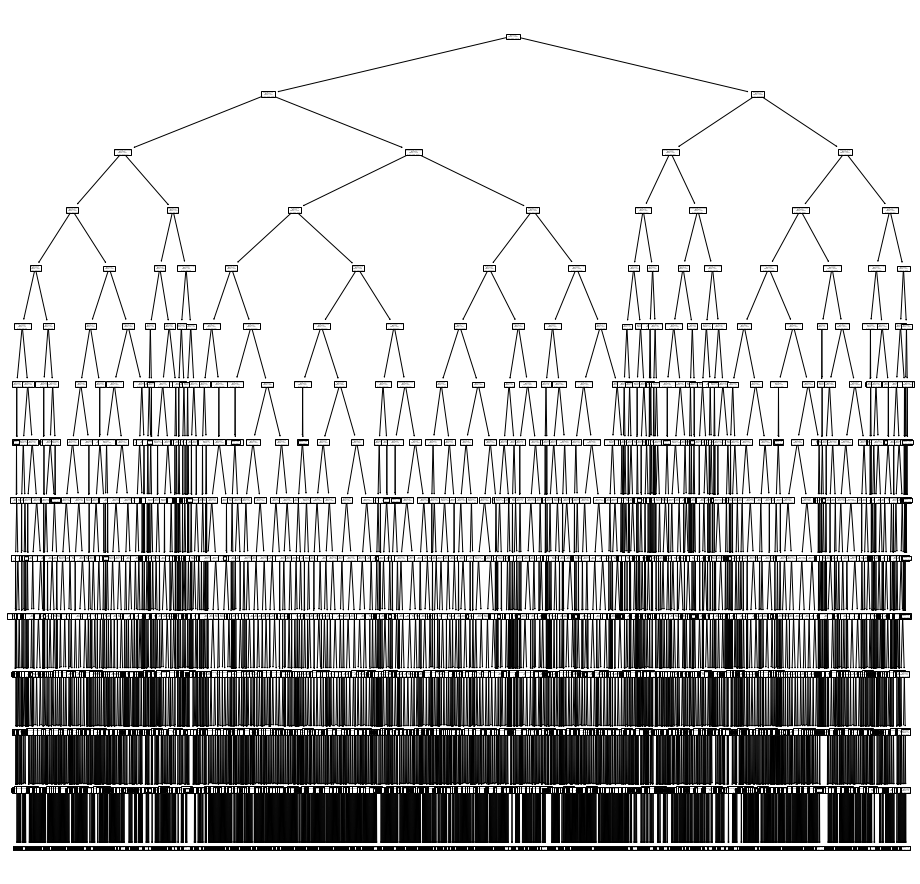

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(ClasificacionAD, feature_names = ['SEXO', 
                       'TIPO_PACIENTE', 
                       'INTUBADO', 
                       'NEUMONIA', 
                       'EDAD', 
                       'DIABETES',
                       'EPOC',
                       'ASMA',
                       'INMUSUPR',
                       'HIPERTENSION',
                       'OTRA_COM',
                       'CARDIOVASCULAR',
                       'OBESIDAD',
                       'RENAL_CRONICA',
                       'TABAQUISMO',
                       'OTRO_CASO',
                       'RESULTADO_ANTIGENO',
                       'CLASIFICACION_FINAL',
                       'UCI'])
plt.show()

#### Modelo Bosques Aleatorios

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
ClasificacionBA = RandomForestClassifier(n_estimators=100,
                                         max_depth=14, 
                                         min_samples_split=4, 
                                         min_samples_leaf=2, 
                                         random_state=0)
ClasificacionBA.fit(X_train, Y_train)

C:\Users\osva_\AppData\Local\Temp\ipykernel_5588\2013119783.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ClasificacionBA.fit(X_train, Y_train)


RandomForestClassifier(max_depth=14, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [26]:
Y_ClasificacionBA = ClasificacionBA.predict(X_validation)
print(Y_ClasificacionBA)

['Vivo' 'Vivo' 'Vivo' ... 'Vivo' 'Vivo' 'Vivo']


In [27]:
ValoresMod2 = pd.DataFrame(Y_validation, Y_ClasificacionBA)
ValoresMod2

,0
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
...,...
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo


In [28]:
accuracy_score(Y_validation, Y_ClasificacionBA)

0.9613937482561237

In [29]:
#Matriz de clasificación
ModeloClasificacion2 = ClasificacionBA.predict(X_validation)
Matriz_Clasificacion2 = pd.crosstab(Y_validation.ravel(),
                                    ModeloClasificacion2,
                                    rownames=['Reales'],
                                    colnames=['Clasificación']) 
Matriz_Clasificacion2

Clasificación,Finado,Vivo
Reales,,
Finado,4135,2695
Vivo,1871,109570


In [30]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionBA.criterion)
print('Importancia variables: \n', ClasificacionBA.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionBA))
print(classification_report(Y_validation, Y_ClasificacionBA))

Criterio: 
 gini
Importancia variables: 
 [0.00563227 0.21235417 0.27061827 0.11481508 0.0272224  0.00505652
 0.00278297 0.00133148 0.00177705 0.00416609 0.00290442 0.0034795
 0.00364905 0.00412973 0.00325506 0.01381383 0.02624255 0.08686137
 0.2099082 ]
Exactitud: 0.9613937482561237
              precision    recall  f1-score   support

      Finado       0.69      0.61      0.64      6830
        Vivo       0.98      0.98      0.98    111441

    accuracy                           0.96    118271
   macro avg       0.83      0.79      0.81    118271
weighted avg       0.96      0.96      0.96    118271



In [31]:
Importancia2 = pd.DataFrame({'Variable': list(Covid[['SEXO', 
                       'TIPO_PACIENTE', 
                       'INTUBADO', 
                       'NEUMONIA', 
                       'EDAD', 
                       'DIABETES',
                       'EPOC',
                       'ASMA',
                       'INMUSUPR',
                       'HIPERTENSION',
                       'OTRA_COM',
                       'CARDIOVASCULAR',
                       'OBESIDAD',
                       'RENAL_CRONICA',
                       'TABAQUISMO',
                       'OTRO_CASO',
                       'RESULTADO_ANTIGENO',
                       'CLASIFICACION_FINAL',
                       'UCI']]), 
                             'Importancia': ClasificacionBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia2

,Variable,Importancia
2,INTUBADO,0.270618
1,TIPO_PACIENTE,0.212354
18,UCI,0.209908
3,NEUMONIA,0.114815
17,CLASIFICACION_FINAL,0.086861
4,EDAD,0.027222
16,RESULTADO_ANTIGENO,0.026243
15,OTRO_CASO,0.013814
0,SEXO,0.005632
5,DIABETES,0.005057


In [32]:
print("Árbol de decisión:", accuracy_score(Y_validation, Y_ClasificacionAD))
print("Bosque aleatorio:", accuracy_score(Y_validation, Y_ClasificacionBA))

Árbol de decisión: 0.9579440437638982
Bosque aleatorio: 0.9613937482561237


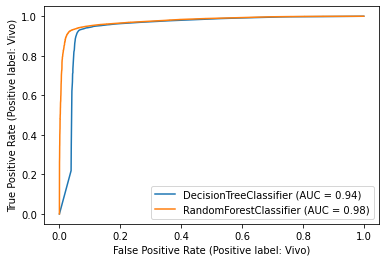

In [33]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(ClasificacionAD,
                               X_validation,
                               Y_validation,
                               ax = ax)
metrics.RocCurveDisplay.from_estimator(ClasificacionBA,
                                         X_validation,
                                         Y_validation,
                                         ax = ax)
plt.show()

#### Pruebas

In [34]:
# Paciente 2155 - FINADO
PacienteAD = pd.DataFrame({'SEXO': [2], 
                       'TIPO_PACIENTE': [2], 
                       'INTUBADO': [2], 
                       'NEUMONIA': [2], 
                       'EDAD': [84], 
                       'DIABETES': [2],
                       'EPOC': [2],
                       'ASMA': [2],
                       'INMUSUPR': [2],
                       'HIPERTENSION': [1],
                       'OTRA_COM': [2],
                       'CARDIOVASCULAR': [2],
                       'OBESIDAD': [2],
                       'RENAL_CRONICA': [2],
                       'TABAQUISMO': [2],
                       'OTRO_CASO': [2],
                       'RESULTADO_ANTIGENO': [1],
                       'CLASIFICACION_FINAL': [3],
                       'UCI': [2]})
ClasificacionAD.predict(PacienteAD)

D:\Users\osva_\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array(['Finado'], dtype=object)

In [35]:
# Paciente 2155 - FINADO
PacienteBA = pd.DataFrame({'SEXO': [2], 
                       'TIPO_PACIENTE': [2], 
                       'INTUBADO': [2], 
                       'NEUMONIA': [2], 
                       'EDAD': [84], 
                       'DIABETES': [2],
                       'EPOC': [2],
                       'ASMA': [2],
                       'INMUSUPR': [2],
                       'HIPERTENSION': [1],
                       'OTRA_COM': [2],
                       'CARDIOVASCULAR': [2],
                       'OBESIDAD': [2],
                       'RENAL_CRONICA': [2],
                       'TABAQUISMO': [2],
                       'OTRO_CASO': [2],
                       'RESULTADO_ANTIGENO': [1],
                       'CLASIFICACION_FINAL': [3],
                       'UCI': [2]})
ClasificacionBA.predict(PacienteBA)

D:\Users\osva_\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['Finado'], dtype=object)